In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from scipy.stats import multivariate_normal
import aa_utils


<font  style="font-size: 4rem; color: #1abc9c"> Bayesian Learning </font>

## Table of Contents
* [Exercise 1: Gaussian Naive Bayes](#exo1)
    * [Naive Bayes exploration](#section_1_1)
    * [Visualization](#section_1_2)
    * [Comparison with KDE](#section_1_3)
    * [Evaluation](#section_1_4)
* [Exercise 2: k-Nearest Neighbors](#exo2)
    * [Basic k-NN](#section_2_1)
    * [Data preprocessing](#section_2_2)
    * [Select $k$ with a validation set](#section_2_3)
* [Appendix: KDE approfondissement](#exo3)
    * [1D KDE (Naive Bayes hypothesis)](#section_3_1)
    * [2D KDE (Multivariate KDE)](#section_3_2)
    * [K-nn cleaning and condensing](#section_3_2)
    


# <font color="#1E90FF">Exercise 1: Gaussian Naive Bayes</font><a class="anchor" id="exo1"></a>

In Scikit-learn, the Gaussian Naive Bayes algorithm for classification is implemented via the <code>GaussianNB</code> class. 

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [ ]:
df = pd.read_csv('./data/data_exam.txt', sep = ' ')
print(df)
dataset = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'})
sns.scatterplot(data=dataset, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [ ]:
# Dataset split into train/test set
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 6)

## <font color="#9400D3">1. Gaussian Naive Bayes Exploration</font><a class="anchor" id="section_1_1"></a>

We learn a Gaussian Naive Bayes classifier on the training data, and analyze the model.

In [ ]:
# learn a Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(data_train.loc[:, ['X1', 'X2']], data_train.Y)
print('Probability of each class:', gnb.class_prior_)
print('Variance of each feature per class:',gnb.var_)
print
print('Mean of each feature per class:',gnb.theta_)

We plot the pdf (probability density function) for $x_1|w_1$ and $x_1|w_2$.


In [ ]:
np_note1_w1 = data_train[data_train.Y == 0].iloc[:, 0].to_numpy()
np_note1_w2 = data_train[data_train.Y == 1].iloc[:, 0].to_numpy()

x = np.linspace(0, 120, 100)
# Plot density for class w1=0
density_w1 = norm.pdf(x, gnb.theta_[0, 0], np.sqrt(gnb.var_[0, 0]))
plt.plot(x, density_w1, color = "blue", linestyle = "-",label='gaussian class 0')
plt.hist(np_note1_w1, density=True, color='blue', alpha=0.2, label='hist class 0')
plt.scatter(np_note1_w1, np.zeros(len(np_note1_w1)), color = "blue")
# Plot density for class w2=1
density_w2 = norm.pdf(x, gnb.theta_[1, 0], np.sqrt(gnb.var_[1, 0]))
plt.plot(x, density_w2, color = "red", linestyle = "-",label='gaussian class 1')
plt.hist(np_note1_w2, density=True, color='red', alpha=0.2, label='hist class 1')
plt.scatter(np_note1_w2, np.zeros(len(np_note1_w2)), color = "red")
plt.legend(loc='upper right')

Plot the pdf for $x_2|w_1$ and $x_2|w_2$.

In [ ]:
# TODO - Plot for x2

np_note2_w1 = data_train[data_train.Y == 0].iloc[:, 1].to_numpy()
np_note2_w2 = data_train[data_train.Y == 1].iloc[:, 1].to_numpy()

x = np.linspace(0, 120, 100)
# Plot density for class w1=0
plt.plot(x, density_w1, color = "blue", linestyle = "-",label='gaussian class 0')
plt.hist(np_note1_w1, density=True, color='blue', alpha=0.2, label='hist class 0')
plt.scatter(np_note1_w1, np.zeros(len(np_note1_w1)), color = "blue")
# Plot density for class w2=1
plt.plot(x, density_w2, color = "red", linestyle = "-",label='gaussian class 1')
plt.hist(np_note1_w2, density=True, color='red', alpha=0.2, label='hist class 1')
plt.scatter(np_note1_w2, np.zeros(len(np_note1_w2)), color = "red")
plt.legend(loc='upper right')


<font color="red">**Question 1:**</font> Compute the class of the first example of the test set. **You will detail the calculation in your report, indicating the formulas (math) used**, before giving their numerical values.

**Tips**:
- $P(x_i|w_j)$ is given by <code>norm.pdf</code>($x_i, \mu_j, \sigma_j$). Check the given code above that plots the densities.
- You can verify your computations using the fonction <code>predict_proba</code>. 

Usage : <code>gnb.predict_proba(data_test.iloc[0,:2].values.reshape(1, -1))</code>
- To end up with the same values, you should compute the 'real' value of $P(w|x)$, which means normalizing by $P(x)$, even if this is not needed in practice to classify the data.

Remember your probas: $P(x)=P(x|w_1) \times P(w_1) + P(x|w_2) \times P(w_2)$

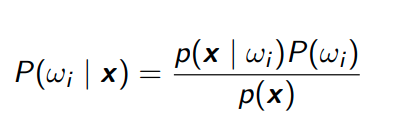

$P(x) = P(x|w_1) \times P(w_1) + P(x|w_2) \times P(w_2)$



In [ ]:
# 'manually' compute the class of the first example in the test set
"""
density_w1 : p(xi|w1)
density_w2 : p(xi|w2)
px          : P(x) = P(x|w_1) * P(w_1) + P(x|w_2) * P(w_2)
p_w1        : P(w_1)
p_w2        : P(w_2)
"""

p_w1 = gnb.class_prior_[0]
p_w2 = gnb.class_prior_[1]

def manually_calcul_P(index):
    x1 = data_test.iloc[index,0]
    x2 = data_test.iloc[index,1]
    p_x_with_w1 = density_w1[index]
    p_x_with_w2 = density_w2[index]
    p_x = p_x_with_w1 * p_w1 + p_x_with_w2 * p_w2

    p_w1_with_x = p_x_with_w1 * p_w1 / p_x
    p_w2_with_x = p_x_with_w2 * p_w2 / p_x


    return [[p_w1_with_x, p_w2_with_x]]
    

index = 0
P_auto = gnb.predict_proba(data_test.iloc[index,:2].values.reshape(1, -1))
P_manually=manually_calcul_P(index)

print("predict proba auto", P_auto)
print("predict manually", P_manually)


## <font color="#9400D3">2. Vizualisation</font><a class="anchor" id="section_1_2"></a>

<font color="red">**Question 2:**</font> For each of the figures below explain what is represented. You will indicate in each case the corresponding mathematical formula.


In [ ]:
# Plot the gaussian NB likelihood
aa_utils.draw_gaussianNB_likelihood(gnb,data_train)

Q2.1 : On the plot we can see two gaussian distributions. One for each class. The two distributions are overlapping. The opacity of the color indicates the likelyhood of the point to belong to the class. The darker the color, the more likely the point belongs to the class. The lighter the color, the more likely the point belongs to the other class.

In [ ]:
# Plot the NB classifier decision boundaries
aa_utils.draw_decision_boundaries(gnb,data_train)

Q2.2 : This plot is representing the decision boundary. One color for each class. To find this boundary, we simply put a treshold on the likelyhood of the point to belong to the class. If the likelyhood is above the treshold, the point belongs to the class. If the likelyhood is below the treshold, the point belongs to the other class.

The decision boundary is the line where the two distributions are equal. It is the line where the two distributions have the same mean. The decision boundary is the line where the two distributions have the same variance.

In [ ]:
# plot Naive Bayes predicted probabilities for class w2
aa_utils.draw_predicted_probabilities(gnb,data_train)

Q2.3 : This plot is representing the probabilities predicted by the model for each point, this is the same plot as Q2.2 but with the opacity of the color indicating the confidence of the model in its prediction. We can see that near the decision boundary, the model is less confident in its prediction thus the color is whiter.

## <font color="#9400D3">3. Comparison with KDE</font><a class="anchor" id="section_1_3"></a>

We now compute the likelihood by Kernel Density Estimation with a 'gaussian' kernel implemented in scikit-learn by <code>KernelDensity</code> class.

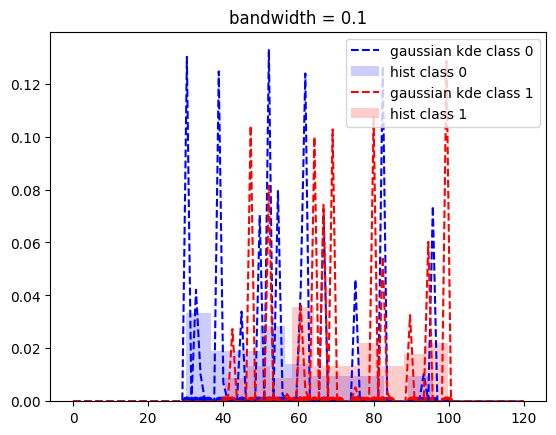

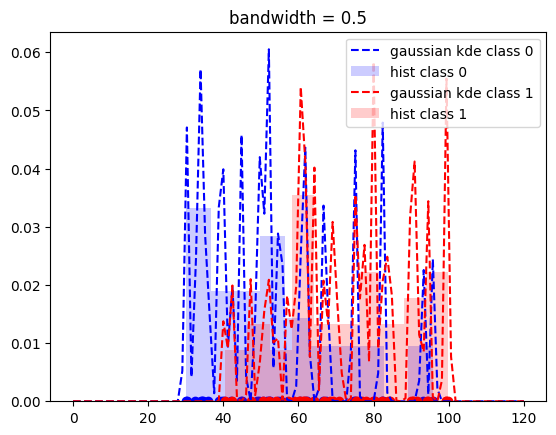

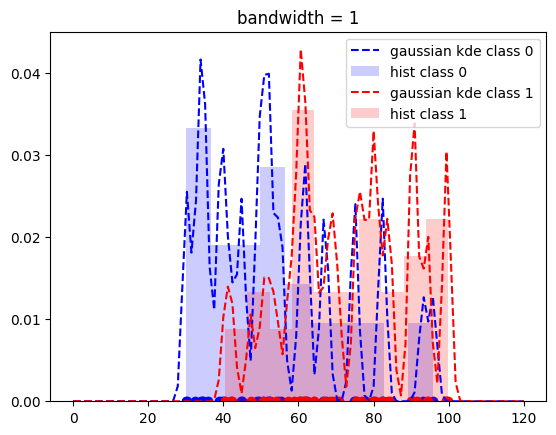

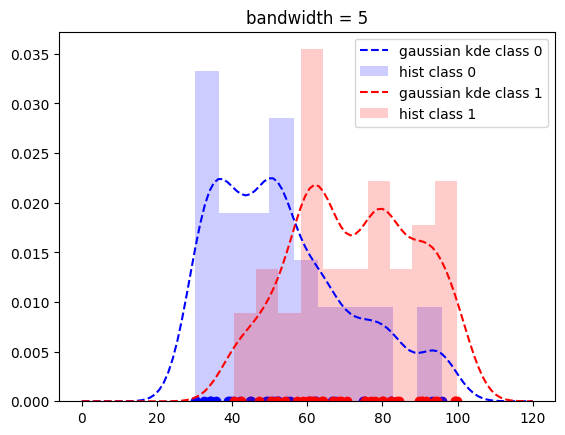

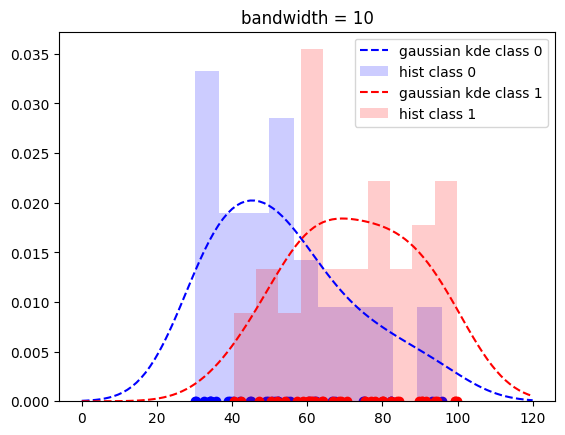

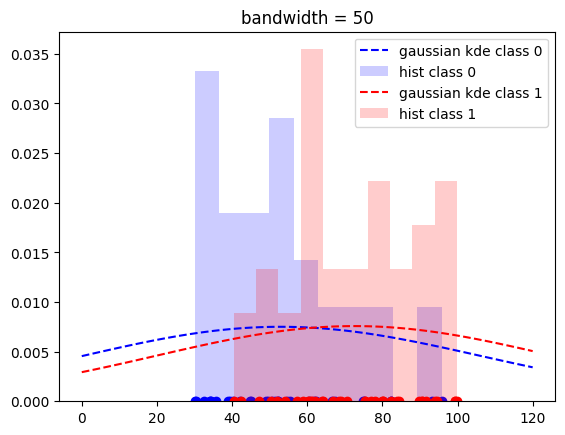

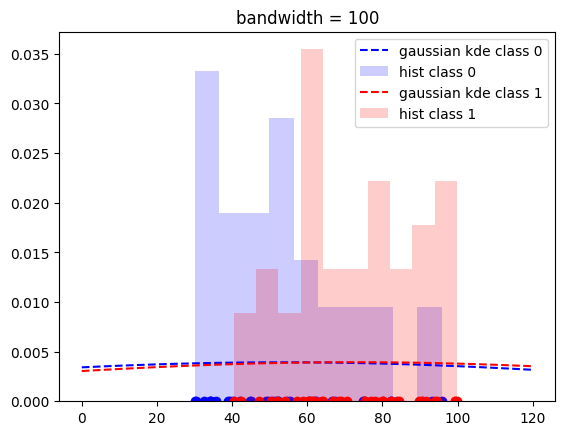

In [99]:
bandwidths = [0.1, 0.5, 1, 5, 10, 50, 100]
for bandwidth in bandwidths:
    plt.figure()
    # Plot density for class w1=0
    gkde_w1 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(np_note1_w1.reshape(-1, 1))
    g_log_dens_w1 = gkde_w1.score_samples(x.reshape(-1, 1))
    plt.plot(x,np.exp(g_log_dens_w1), color="blue",linestyle="--", label='gaussian kde class 0')
    plt.hist(np_note1_w1, density=True, color='blue', alpha=0.2, label='hist class 0')
    plt.scatter(np_note1_w1, np.zeros(len(np_note1_w1)), color = "blue")

    # Plot density for class w2=1
    gkde_w2 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(np_note1_w2.reshape(-1, 1))
    g_log_dens_w2 = gkde_w2.score_samples(x.reshape(-1, 1))
    plt.plot(x,np.exp(g_log_dens_w2), color="red",linestyle="--", label='gaussian kde class 1')
    plt.hist(np_note1_w2, density=True, color='red', alpha=0.2, label='hist class 1')
    plt.scatter(np_note1_w2, np.zeros(len(np_note1_w2)), color = "red")
    plt.legend(loc='upper right')
    plt.title("bandwidth = {}".format(bandwidth))

<font color="red">**Question 3:**</font> 
Explain the difference between the estimation of $P(x|w)$ by a gaussian pdf, and the gaussian KDE.

> 3 : The KDE comparison create a gausian distribution for each class and then add them together to create the final distribution. Unlike the simple gaussian which the hypothesis is that the global distribution is gaussian.
> Gaussian PDF assumes symmetrical, unimodal data, while Gaussian KDE can handle skewed or multi-modal data


<font color="red">**Question 4:**</font> Change the value of the <code>bandwith</code> parameter (give a float value). Conclude on the influence of this parameter.

Rather than assuming attributes independance and use 1D density estimation, KDE can advantageously be used on all the attributes. In our case, the kernel used is a 2D gaussian parametrized by the bandwith $h$.

Observe below the difference with the likelihood estimated by the gaussian NB. You can change the bandwith parameter value to see the effects of this hyper-parameter.

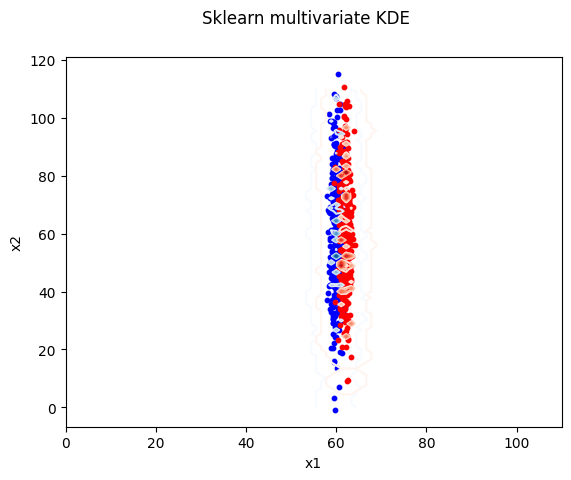

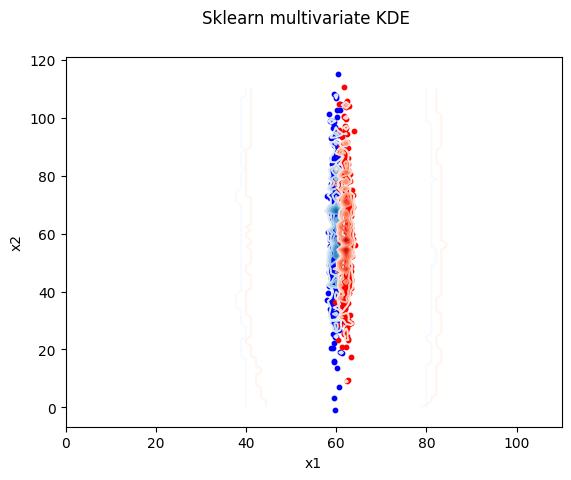

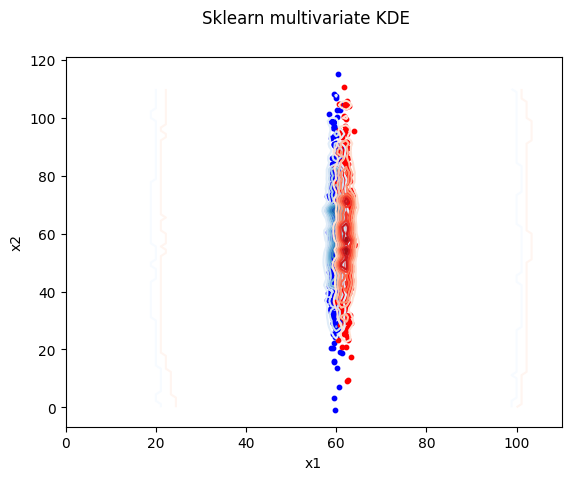

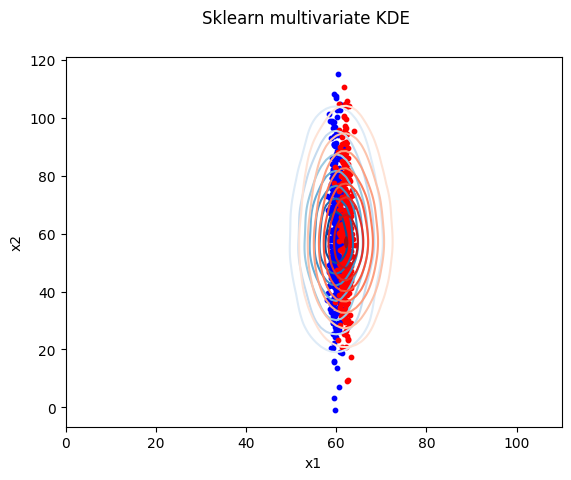

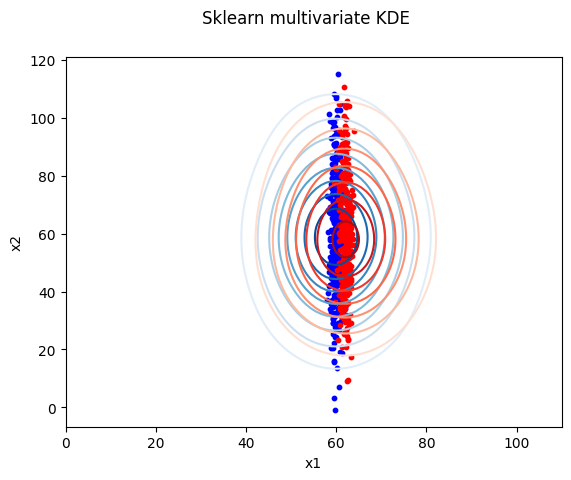

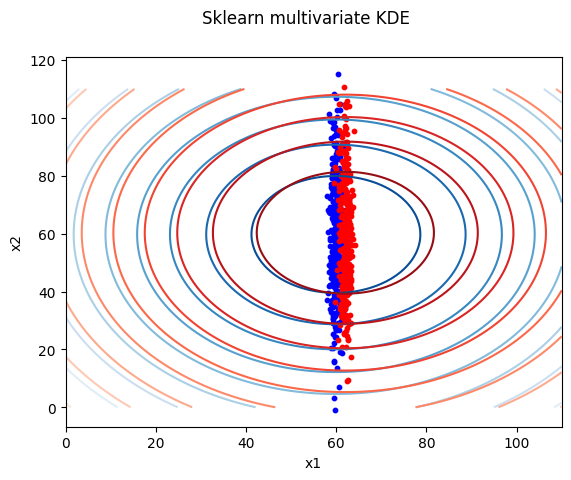

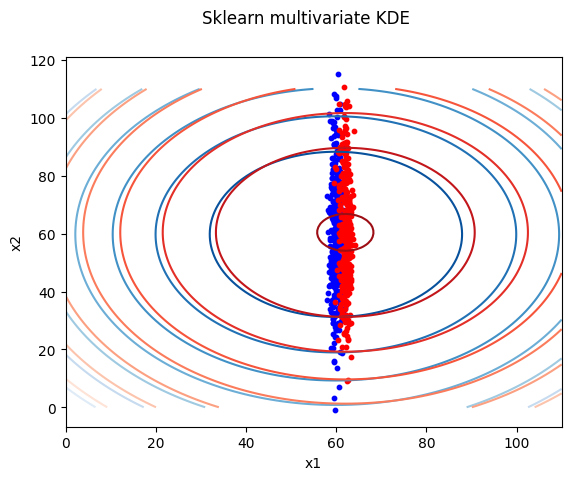

In [100]:
# Plot Multivariate KDE
# bw_h is the bandwith parameter
for bandwidth in bandwidths:
    aa_utils.draw_sk_kde_densities(bw_h=bandwidth,data=data_train)

> Q4 : The badnwith is related to the variance of the gaussian distribution.
> The smaller the bandwith parameter is, the highter the scope of the is for each class and vice versa.
> The float value of the bandwith allow to fine tune the variance of the gaussian distribution.
> We notice that a small bandwith can introduce overfitting and a big bandwith can introduce underfitting.

## <font color="#9400D3">4. Evaluation</font><a class="anchor" id="section_1_4"></a>

There is no implementation in scikit-learn of a Bayes Classifier using KDE.

<font color="blue">**TODO:**</font> Implement the KDE-based Bayes classifier.

**Hints:** Following methods will be usefull:
- <code>kde.score_samples(X)</code> : compute the log-likelihood of each sample under the model
- to get the likelihood: <code>np.exp(kde.score_samples(X))</code>

where <code>kde</code> is the Kernel Density estimator (model).

<font color="red">**Question 5:**</font> Compare **in a table** the performances in generalization of the gaussian NB and a KDE-based Bayes classifier in terms of accuracy or error, for different values of $h$ and different kernels.

<code>KernelDensity</code> implements several common kernel forms. Refer to the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

- what is $h$ in the gaussian kernel?

In [101]:
# TODO - Performance of NB
data_test
X = data_test.iloc[:,0:2]
y = data_test.iloc[:,2]
print("Accuracy of Gaussian NB", gnb.score(X, y))

Accuracy of Gaussian NB 0.5333333333333333


In [124]:
# TODO - Bayes classification with 2D KDE and evaluation

kde = KernelDensity(kernel='gaussian', bandwidth=1)
kde.fit(data_train.iloc[:,0:2])

density = np.exp(kde.score_samples(X))



# <font color="#1E90FF">Exercise 2: k-Nearest Neighbors</font><a class="anchor" id="exo2"></a>

## <font color="#9400D3">1. Basic k-NN</font>

We will first look at the k-nn classifier with $k=1$.


        X1     X2    Y
0    59.16  31.60  0.0
1    61.41  68.00  0.0
2    61.60  84.33  1.0
3    61.69  27.78  0.0
4    61.42  27.17  1.0
..     ...    ...  ...
995  60.06  38.46  0.0
996  61.88  34.42  0.0
997  62.49  39.04  1.0
998  63.31  67.56  1.0
999  61.22  86.92  1.0

[1000 rows x 3 columns]


<AxesSubplot: xlabel='X1', ylabel='X2'>

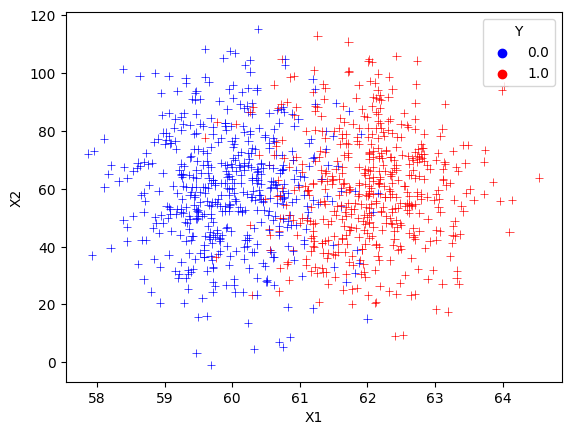

In [103]:
# load data
df = pd.read_csv('./data/knn_dataset.csv', sep = ',')
print(df)
sns.scatterplot(data=df, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [104]:
# Split data
data_train, data_test = train_test_split(df, test_size = 0.3, random_state = 13)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 13)

In [105]:
# k-NN
nn_clf = KNeighborsClassifier(n_neighbors=1) # this initializes a knn for k = 1
nn_clf.fit(data_train.iloc[:,:-1],data_train.Y)

KNeighborsClassifier(n_neighbors=1)

<font color="red">**Question 1:**</font> Which distance among samples is used to compute the nearest neighobors?

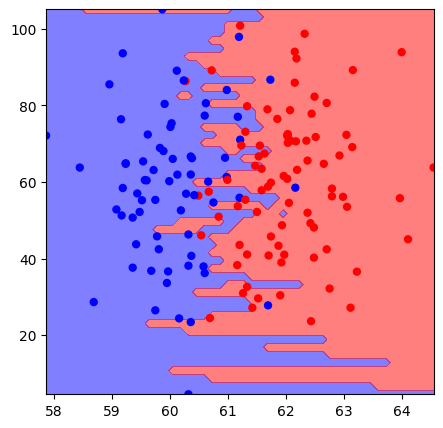

In [106]:
# Affichage frontiere de decision
aa_utils.draw_decision_boundaries(nn_clf,data_test)

In [107]:
# Knn classifier evaluation
print('Accuracy test sample :', nn_clf.score(data_test.iloc[:,:-1], data_test.Y))

Accuracy test sample : 0.8133333333333334


## <font color="#9400D3">2. Data preprocessing</font><a class="anchor" id="section_2_2"></a>

When classifiers are based on distance calculations between examples, it may be important to preprocess the data.

<AxesSubplot: xlabel='X1', ylabel='X2'>

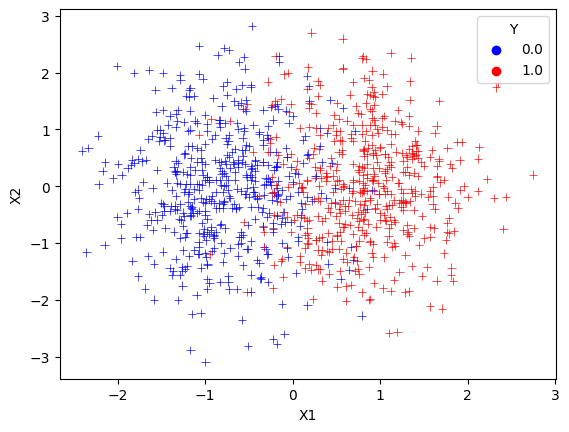

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
np_scaled=scaler.fit_transform(df.iloc[:,:-1])

df_scaled = pd.DataFrame(np_scaled, columns=['X1','X2'])
df_scaled['Y'] = df.Y
sns.scatterplot(data=df_scaled, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

<font color="red">**Question 2:**</font> What is the effect of the pre-processing applied here?

<font color="red">**Question 3:**</font> 
- Compare the performance of the KNN classifier using pre-processed data with the previous one. 
- Explain why the classifier benefits from the pre-processing.

In [109]:
# TODO - Evaluate the KNN classifier with pre-processed data


In [110]:
# Affichage frontiere de decision
#aa_utils.draw_decision_boundaries(model,data)

## <font color="#9400D3">3. Select $k$ with a validation set</font><a class="anchor" id="section_2_3"></a>

$k$ being an hyper-parameter of the KNN classifier, its value should be tuned using a validation set.

<font color="blue">**TODO:**</font> 
- Plot the validation error as a function of $k$
- Select the best value of $k$
- Evaluate the resulting classifier
- Plot the decision boundaries

In [111]:
# TODO - Plot the validation error as a function of the number of neighbors.


In [112]:
# Find the best hyper-parameter k


# Evaluate the classifier


In [113]:
# Affichage frontiere de decision
#aa_utils.draw_decision_boundaries(...)

<font color="red">**Question 4:**</font> Compare the performances of the (gaussian) Naive Bayes and the (tuned) k-NN classifiers.


In [114]:
# TODO - NB and k-NN classifiers comparison

